# Detect objects using ResNet and ImageAI ###
source: https://www.kaggle.com/shivamb/objects-bounding-boxes-using-resnet50-imageai

install: https://imageai.readthedocs.io/en/latest/index.html


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Import the required libraries 

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input
from keras.utils.data_utils import GeneratorEnqueuer
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import pandas as pd 
import numpy as np 
import math, os

%matplotlib inline

Using TensorFlow backend.


### Vocabulary ###

In [3]:
vocab = {"/m/011k07": "Tortoise", "/m/011q46kg": "Container", "/m/012074": "Magpie", "/m/0120dh": "Sea turtle", "/m/01226z": "Football", "/m/012n7d": "Ambulance", "/m/012w5l": "Ladder", "/m/012xff": "Toothbrush", "/m/012ysf": "Syringe", "/m/0130jx": "Sink", "/m/0138tl": "Toy", "/m/013y1f": "Organ", "/m/01432t": "Cassette deck", "/m/014j1m": "Apple", "/m/014sv8": "Human eye", "/m/014trl": "Cosmetics", "/m/014y4n": "Paddle", "/m/0152hh": "Snowman", "/m/01599": "Beer", "/m/01_5g": "Chopsticks", "/m/015h_t": "Human beard", "/m/015p6": "Bird", "/m/015qbp": "Parking meter", "/m/015qff": "Traffic light", "/m/015wgc": "Croissant", "/m/015x4r": "Cucumber", "/m/015x5n": "Radish", "/m/0162_1": "Towel", "/m/0167gd": "Doll", "/m/016m2d": "Skull", "/m/0174k2": "Washing machine", "/m/0174n1": "Glove", "/m/0175cv": "Tick", "/m/0176mf": "Belt", "/m/017ftj": "Sunglasses", "/m/018j2": "Banjo", "/m/018p4k": "Cart", "/m/018xm": "Ball", "/m/01940j": "Backpack", "/m/0199g": "Bicycle", "/m/019dx1": "Home appliance", "/m/019h78": "Centipede", "/m/019jd": "Boat", "/m/019w40": "Surfboard", "/m/01b638": "Boot", "/m/01b7fy": "Headphones", "/m/01b9xk": "Hot dog", "/m/01bfm9": "Shorts", "/m/01_bhs": "Fast food", "/m/01bjv": "Bus", "/m/01bl7v": "Boy", "/m/01bms0": "Screwdriver", "/m/01bqk0": "Bicycle wheel", "/m/01btn": "Barge", "/m/01c648": "Laptop", "/m/01cmb2": "Miniskirt", "/m/01d380": "Drill", "/m/01d40f": "Dress", "/m/01dws": "Bear", "/m/01dwsz": "Waffle", "/m/01dwwc": "Pancake", "/m/01dxs": "Brown bear", "/m/01dy8n": "Woodpecker", "/m/01f8m5": "Blue jay", "/m/01f91_": "Pretzel", "/m/01fb_0": "Bagel", "/m/01fdzj": "Tower", "/m/01fh4r": "Teapot", "/m/01g317": "Person", "/m/01g3x7": "Bow and arrow", "/m/01gkx_": "Swimwear", "/m/01gllr": "Beehive", "/m/01gmv2": "Brassiere", "/m/01h3n": "Bee", "/m/01h44": "Bat", "/m/01h8tj": "Starfish", "/m/01hrv5": "Popcorn", "/m/01j3zr": "Burrito", "/m/01j4z9": "Chainsaw", "/m/01j51": "Balloon", "/m/01j5ks": "Wrench", "/m/01j61q": "Tent", "/m/01jfm_": "Vehicle registration plate", "/m/01jfsr": "Lantern", "/m/01k6s3": "Toaster", "/m/01kb5b": "Flashlight", "/m/01knjb": "Billboard", "/m/01krhy": "Tiara", "/m/01lcw4": "Limousine", "/m/01llwg": "Necklace", "/m/01lrl": "Carnivore", "/m/01lsmm": "Scissors", "/m/01lynh": "Stairs", "/m/01m2v": "Computer keyboard", "/m/01m4t": "Printer", "/m/01mqdt": "Traffic sign", "/m/01mzpv": "Chair", "/m/01n4qj": "Shirt", "/m/01n5jq": "Poster", "/m/01nkt": "Cheese", "/m/01nq26": "Sock", "/m/01pns0": "Fire hydrant", "/m/01prls": "Land vehicle", "/m/01r546": "Earrings", "/m/01rkbr": "Tie", "/m/01rzcn": "Watercraft", "/m/01s105": "Cabinetry", "/m/01s55n": "Suitcase", "/m/01tcjp": "Muffin", "/m/01vbnl": "Bidet", "/m/01ww8y": "Snack", "/m/01x3jk": "Snowmobile", "/m/01x3z": "Clock", "/m/01xgg_": "Medical equipment", "/m/01xq0k1": "Cattle", "/m/01xqw": "Cello", "/m/01xs3r": "Jet ski", "/m/01x_v": "Camel", "/m/01xygc": "Coat", "/m/01xyhv": "Suit", "/m/01y9k5": "Desk", "/m/01yrx": "Cat", "/m/01yx86": "Bronze sculpture", "/m/01z1kdw": "Juice", "/m/02068x": "Gondola", "/m/020jm": "Beetle", "/m/020kz": "Cannon", "/m/020lf": "Computer mouse", "/m/021mn": "Cookie", "/m/021sj1": "Office building", "/m/0220r2": "Fountain", "/m/0242l": "Coin", "/m/024d2": "Calculator", "/m/024g6": "Cocktail", "/m/02522": "Computer monitor", "/m/025dyy": "Box", "/m/025fsf": "Stapler", "/m/025nd": "Christmas tree", "/m/025rp__": "Cowboy hat", "/m/0268lbt": "Hiking equipment", "/m/026qbn5": "Studio couch", "/m/026t6": "Drum", "/m/0270h": "Dessert", "/m/0271qf7": "Wine rack", "/m/0271t": "Drink", "/m/027pcv": "Zucchini", "/m/027rl48": "Ladle", "/m/0283dt1": "Human mouth", "/m/0284d": "Dairy", "/m/029b3": "Dice", "/m/029bxz": "Oven", "/m/029tx": "Dinosaur", "/m/02bm9n": "Ratchet", "/m/02crq1": "Couch", "/m/02ctlc": "Cricket ball", "/m/02cvgx": "Winter melon", "/m/02d1br": "Spatula", "/m/02d9qx": "Whiteboard", "/m/02ddwp": "Pencil sharpener", "/m/02dgv": "Door", "/m/02dl1y": "Hat", "/m/02f9f_": "Shower", "/m/02fh7f": "Eraser", "/m/02fq_6": "Fedora", "/m/02g30s": "Guacamole", "/m/02gzp": "Dagger", "/m/02h19r": "Scarf", "/m/02hj4": "Dolphin", "/m/02jfl0": "Sombrero", "/m/02jnhm": "Tin can", "/m/02jvh9": "Mug", "/m/02jz0l": "Tap", "/m/02l8p9": "Harbor seal", "/m/02lbcq": "Stretcher", "/m/02mqfb": "Can opener", "/m/02_n6y": "Goggles", "/m/02p0tk3": "Human body", "/m/02p3w7d": "Roller skates", "/m/02p5f1q": "Coffee cup", "/m/02pdsw": "Cutting board", "/m/02pjr4": "Blender", "/m/02pkr5": "Plumbing fixture", "/m/02pv19": "Stop sign", "/m/02rdsp": "Office supplies", "/m/02rgn06": "Volleyball", "/m/02s195": "Vase", "/m/02tsc9": "Slow cooker", "/m/02vkqh8": "Wardrobe", "/m/02vqfm": "Coffee", "/m/02vwcm": "Whisk", "/m/02w3r3": "Paper towel", "/m/02w3_ws": "Personal care", "/m/02wbm": "Food", "/m/02wbtzl": "Sun hat", "/m/02wg_p": "Tree house", "/m/02wmf": "Flying disc", "/m/02wv6h6": "Skirt", "/m/02wv84t": "Gas stove", "/m/02x8cch": "Salt and pepper shakers", "/m/02x984l": "Mechanical fan", "/m/02xb7qb": "Face powder", "/m/02xqq": "Fax", "/m/02xwb": "Fruit", "/m/02y6n": "French fries", "/m/02z51p": "Nightstand", "/m/02zn6n": "Barrel", "/m/02zt3": "Kite", "/m/02zvsm": "Tart", "/m/030610": "Treadmill", "/m/0306r": "Fox", "/m/03120": "Flag", "/m/0319l": "Horn", "/m/031b6r": "Window blind", "/m/031n1": "Human foot", "/m/0323sq": "Golf cart", "/m/032b3c": "Jacket", "/m/033cnk": "Egg", "/m/033rq4": "Street light", "/m/0342h": "Guitar", "/m/034c16": "Pillow", "/m/035r7c": "Human leg", "/m/035vxb": "Isopod", "/m/0388q": "Grape", "/m/039xj_": "Human ear", "/m/03bbps": "Power plugs and sockets", "/m/03bj1": "Panda", "/m/03bk1": "Giraffe", "/m/03bt1vf": "Woman", "/m/03c7gz": "Door handle", "/m/03d443": "Rhinoceros", "/m/03dnzn": "Bathtub", "/m/03fj2": "Goldfish", "/m/03fp41": "Houseplant", "/m/03fwl": "Goat", "/m/03g8mr": "Baseball bat", "/m/03grzl": "Baseball glove", "/m/03hj559": "Mixing bowl", "/m/03hl4l9": "Marine invertebrates", "/m/03hlz0c": "Kitchen utensil", "/m/03jbxj": "Light switch", "/m/03jm5": "House", "/m/03k3r": "Horse", "/m/03kt2w": "Stationary bicycle", "/m/03l9g": "Hammer", "/m/03ldnb": "Ceiling fan", "/m/03m3pdh": "Sofa bed", "/m/03m3vtv": "Adhesive tape", "/m/03m5k": "Harp", "/m/03nfch": "Sandal", "/m/03p3bw": "Bicycle helmet", "/m/03q5c7": "Saucer", "/m/03q5t": "Harpsichord", "/m/03q69": "Human hair", "/m/03qhv5": "Heater", "/m/03qjg": "Harmonica", "/m/03qrc": "Hamster", "/m/03rszm": "Curtain", "/m/03ssj5": "Bed", "/m/03s_tn": "Kettle", "/m/03tw93": "Fireplace", "/m/03txqz": "Scale", "/m/03v5tg": "Drinking straw", "/m/03vt0": "Insect", "/m/03wvsk": "Hair dryer", "/m/03_wxk": "Kitchenware", "/m/03wym": "Indoor rower", "/m/03xxp": "Invertebrate", "/m/03y6mg": "Food processor", "/m/03__z0": "Bookcase", "/m/040b_t": "Refrigerator", "/m/04169hn": "Wood-burning stove", "/m/0420v5": "Punching bag", "/m/043nyj": "Common fig", "/m/0440zs": "Cocktail shaker", "/m/0449p": "Jaguar", "/m/044r5d": "Golf ball", "/m/0463sg": "Fashion accessory", "/m/046dlr": "Alarm clock", "/m/047j0r": "Filing cabinet", "/m/047v4b": "Artichoke", "/m/04bcr3": "Table", "/m/04brg2": "Tableware", "/m/04c0y": "Kangaroo", "/m/04cp_": "Koala", "/m/04ctx": "Knife", "/m/04dr76w": "Bottle", "/m/04f5ws": "Bottle opener", "/m/04g2r": "Lynx", "/m/04gth": "Lavender", "/m/04h7h": "Lighthouse", "/m/04h8sr": "Dumbbell", "/m/04hgtk": "Human head", "/m/04kkgm": "Bowl", "/m/04lvq_": "Humidifier", "/m/04m6gz": "Porch", "/m/04m9y": "Lizard", "/m/04p0qw": "Billiard table", "/m/04rky": "Mammal", "/m/04rmv": "Mouse", "/m/04_sv": "Motorcycle", "/m/04szw": "Musical instrument", "/m/04tn4x": "Swim cap", "/m/04v6l4": "Frying pan", "/m/04vv5k": "Snowplow", "/m/04y4h8h": "Bathroom cabinet", "/m/04ylt": "Missile", "/m/04yqq2": "Bust", "/m/04yx4": "Man", "/m/04z4wx": "Waffle iron", "/m/04zpv": "Milk", "/m/04zwwv": "Ring binder", "/m/050gv4": "Plate", "/m/050k8": "Mobile phone", "/m/052lwg6": "Baked goods", "/m/052sf": "Mushroom", "/m/05441v": "Crutch", "/m/054fyh": "Pitcher", "/m/054_l": "Mirror", "/m/054xkw": "Lifejacket", "/m/05_5p_0": "Table tennis racket", "/m/05676x": "Pencil case", "/m/057cc": "Musical keyboard", "/m/057p5t": "Scoreboard", "/m/0584n8": "Briefcase", "/m/058qzx": "Kitchen knife", "/m/05bm6": "Nail", "/m/05ctyq": "Tennis ball", "/m/05gqfk": "Plastic bag", "/m/05kms": "Oboe", "/m/05kyg_": "Chest of drawers", "/m/05n4y": "Ostrich", "/m/05r5c": "Piano", "/m/05r655": "Girl", "/m/05s2s": "Plant", "/m/05vtc": "Potato", "/m/05w9t9": "Hair spray", "/m/05y5lj": "Sports equipment", "/m/05z55": "Pasta", "/m/05z6w": "Penguin", "/m/05zsy": "Pumpkin", "/m/061_f": "Pear", "/m/061hd_": "Infant bed", "/m/0633h": "Polar bear", "/m/063rgb": "Mixer", "/m/0642b4": "Cupboard", "/m/065h6l": "Jacuzzi", "/m/0663v": "Pizza", "/m/06_72j": "Digital clock", "/m/068zj": "Pig", "/m/06bt6": "Reptile", "/m/06c54": "Rifle", "/m/06c7f7": "Lipstick", "/m/06_fw": "Skateboard", "/m/06j2d": "Raven", "/m/06k2mb": "High heels", "/m/06l9r": "Red panda", "/m/06m11": "Rose", "/m/06mf6": "Rabbit", "/m/06msq": "Sculpture", "/m/06ncr": "Saxophone", "/m/06nrc": "Shotgun", "/m/06nwz": "Seafood", "/m/06pcq": "Submarine sandwich", "/m/06__v": "Snowboard", "/m/06y5r": "Sword", "/m/06z37_": "Picture frame", "/m/07030": "Sushi", "/m/0703r8": "Loveseat", "/m/071p9": "Ski", "/m/071qp": "Squirrel", "/m/073bxn": "Tripod", "/m/073g6": "Stethoscope", "/m/074d1": "Submarine", "/m/0755b": "Scorpion", "/m/076bq": "Segway", "/m/076lb9": "Training bench", "/m/078jl": "Snake", "/m/078n6m": "Coffee table", "/m/079cl": "Skyscraper", "/m/07bgp": "Sheep", "/m/07c52": "Television", "/m/07c6l": "Trombone", "/m/07clx": "Tea", "/m/07cmd": "Tank", "/m/07crc": "Taco", "/m/07cx4": "Telephone", "/m/07dd4": "Torch", "/m/07dm6": "Tiger", "/m/07fbm7": "Strawberry", "/m/07gql": "Trumpet", "/m/07j7r": "Tree", "/m/07j87": "Tomato", "/m/07jdr": "Train", "/m/07k1x": "Tool", "/m/07kng9": "Picnic basket", "/m/07mcwg": "Cooking spray", "/m/07mhn": "Trousers", "/m/07pj7bq": "Bowling equipment", "/m/07qxg_": "Football helmet", "/m/07r04": "Truck", "/m/07v9_z": "Measuring cup", "/m/07xyvk": "Coffeemaker", "/m/07y_7": "Violin", "/m/07yv9": "Vehicle", "/m/080hkjn": "Handbag", "/m/080n7g": "Paper cutter", "/m/081qc": "Wine", "/m/083kb": "Weapon", "/m/083wq": "Wheel", "/m/084hf": "Worm", "/m/084rd": "Wok", "/m/084zz": "Whale", "/m/0898b": "Zebra", "/m/08dz3q": "Auto part", "/m/08hvt4": "Jug", "/m/08ks85": "Pizza cutter", "/m/08p92x": "Cream", "/m/08pbxl": "Monkey", "/m/096mb": "Lion", "/m/09728": "Bread", "/m/099ssp": "Platter", "/m/09b5t": "Chicken", "/m/09csl": "Eagle", "/m/09ct_": "Helicopter", "/m/09d5_": "Owl", "/m/09ddx": "Duck", "/m/09dzg": "Turtle", "/m/09f20": "Hippopotamus", "/m/09f_2": "Crocodile", "/m/09g1w": "Toilet", "/m/09gtd": "Toilet paper", "/m/09gys": "Squid", "/m/09j2d": "Clothing", "/m/09j5n": "Footwear", "/m/09k_b": "Lemon", "/m/09kmb": "Spider", "/m/09kx5": "Deer", "/m/09ld4": "Frog", "/m/09qck": "Banana", "/m/09rvcxw": "Rocket", "/m/09tvcd": "Wine glass", "/m/0b3fp9": "Countertop", "/m/0bh9flk": "Tablet computer", "/m/0bjyj5": "Waste container", "/m/0b_rs": "Swimming pool", "/m/0bt9lr": "Dog", "/m/0bt_c3": "Book", "/m/0bwd_0j": "Elephant", "/m/0by6g": "Shark", "/m/0c06p": "Candle", "/m/0c29q": "Leopard", "/m/0c2jj": "Axe", "/m/0c3m8g": "Hand dryer", "/m/0c3mkw": "Soap dispenser", "/m/0c568": "Porcupine", "/m/0c9ph5": "Flower", "/m/0ccs93": "Canary", "/m/0cd4d": "Cheetah", "/m/0cdl1": "Palm tree", "/m/0cdn1": "Hamburger", "/m/0cffdh": "Maple", "/m/0cgh4": "Building", "/m/0ch_cf": "Fish", "/m/0cjq5": "Lobster", "/m/0cjs7": "Asparagus", "/m/0c_jw": "Furniture", "/m/0cl4p": "Hedgehog", "/m/0cmf2": "Airplane", "/m/0cmx8": "Spoon", "/m/0cn6p": "Otter", "/m/0cnyhnx": "Bull", "/m/0_cp5": "Oyster", "/m/0cqn2": "Horizontal bar", "/m/0crjs": "Convenience store", "/m/0ct4f": "Bomb", "/m/0cvnqh": "Bench", "/m/0cxn2": "Ice cream", "/m/0cydv": "Caterpillar", "/m/0cyf8": "Butterfly", "/m/0cyfs": "Parachute", "/m/0cyhj_": "Orange", "/m/0czz2": "Antelope", "/m/0d20w4": "Beaker", "/m/0d_2m": "Moths and butterflies", "/m/0d4v4": "Window", "/m/0d4w1": "Closet", "/m/0d5gx": "Castle", "/m/0d8zb": "Jellyfish", "/m/0dbvp": "Goose", "/m/0dbzx": "Mule", "/m/0dftk": "Swan", "/m/0dj6p": "Peach", "/m/0djtd": "Coconut", "/m/0dkzw": "Seat belt", "/m/0dq75": "Raccoon", "/m/0_dqb": "Chisel", "/m/0dt3t": "Fork", "/m/0dtln": "Lamp", "/m/0dv5r": "Camera", "/m/0dv77": "Squash", "/m/0dv9c": "Racket", "/m/0dzct": "Human face", "/m/0dzf4": "Human arm", "/m/0f4s2w": "Vegetable", "/m/0f571": "Diaper", "/m/0f6nr": "Unicycle", "/m/0f6wt": "Falcon", "/m/0f8s22": "Chime", "/m/0f9_l": "Snail", "/m/0fbdv": "Shellfish", "/m/0fbw6": "Cabbage", "/m/0fj52s": "Carrot", "/m/0fldg": "Mango", "/m/0fly7": "Jeans", "/m/0fm3zh": "Flowerpot", "/m/0fp6w": "Pineapple", "/m/0fqfqc": "Drawer", "/m/0fqt361": "Stool", "/m/0frqm": "Envelope", "/m/0fszt": "Cake", "/m/0ft9s": "Dragonfly", "/m/0ftb8": "Sunflower", "/m/0fx9l": "Microwave oven", "/m/0fz0h": "Honeycomb", "/m/0gd2v": "Marine mammal", "/m/0gd36": "Sea lion", "/m/0gj37": "Ladybug", "/m/0gjbg72": "Shelf", "/m/0gjkl": "Watch", "/m/0gm28": "Candy", "/m/0grw1": "Salad", "/m/0gv1x": "Parrot", "/m/0gxl3": "Handgun", "/m/0h23m": "Sparrow", "/m/0h2r6": "Van", "/m/0h8jyh6": "Grinder", "/m/0h8kx63": "Spice rack", "/m/0h8l4fh": "Light bulb", "/m/0h8lkj8": "Corded phone", "/m/0h8mhzd": "Sports uniform", "/m/0h8my_4": "Tennis racket", "/m/0h8mzrc": "Wall clock", "/m/0h8n27j": "Serving tray", "/m/0h8n5zk": "Kitchen & dining room table", "/m/0h8n6f9": "Dog bed", "/m/0h8n6ft": "Cake stand", "/m/0h8nm9j": "Cat furniture", "/m/0h8nr_l": "Bathroom accessory", "/m/0h8nsvg": "Facial tissue holder", "/m/0h8ntjv": "Pressure cooker", "/m/0h99cwc": "Kitchen appliance", "/m/0h9mv": "Tire", "/m/0hdln": "Ruler", "/m/0hf58v5": "Luggage and bags", "/m/0hg7b": "Microphone", "/m/0hkxq": "Broccoli", "/m/0hnnb": "Umbrella", "/m/0hnyx": "Pastry", "/m/0hqkz": "Grapefruit", "/m/0j496": "Band-aid", "/m/0jbk": "Animal", "/m/0jg57": "Bell pepper", "/m/0jly1": "Turkey", "/m/0jqgx": "Lily", "/m/0jwn_": "Pomegranate", "/m/0jy4k": "Doughnut", "/m/0jyfg": "Glasses", "/m/0k0pj": "Human nose", "/m/0k1tl": "Pen", "/m/0_k2": "Ant", "/m/0k4j": "Car", "/m/0k5j": "Aircraft", "/m/0k65p": "Human hand", "/m/0km7z": "Skunk", "/m/0kmg4": "Teddy bear", "/m/0kpqd": "Watermelon", "/m/0kpt_": "Cantaloupe", "/m/0ky7b": "Dishwasher", "/m/0l14j_": "Flute", "/m/0l3ms": "Balance beam", "/m/0l515": "Sandwich", "/m/0ll1f78": "Shrimp", "/m/0llzx": "Sewing machine", "/m/0lt4_": "Binoculars", "/m/0m53l": "Rays and skates", "/m/0mcx2": "Ipod", "/m/0mkg": "Accordion", "/m/0mw_6": "Willow", "/m/0n28_": "Crab", "/m/0nl46": "Crown", "/m/0nybt": "Seahorse", "/m/0p833": "Perfume", "/m/0pcr": "Alpaca", "/m/0pg52": "Taxi", "/m/0ph39": "Canoe", "/m/0qjjc": "Remote control", "/m/0qmmr": "Wheelchair", "/m/0wdt60w": "Rugby ball", "/m/0xfy": "Armadillo", "/m/0xzly": "Maracas", "/m/0zvk5": "Helmet"}
rev = {}
for k,v in vocab.items():
    rev[v.lower()] = k

In [4]:
rev

{'tortoise': '/m/011k07',
 'container': '/m/011q46kg',
 'magpie': '/m/012074',
 'sea turtle': '/m/0120dh',
 'football': '/m/01226z',
 'ambulance': '/m/012n7d',
 'ladder': '/m/012w5l',
 'toothbrush': '/m/012xff',
 'syringe': '/m/012ysf',
 'sink': '/m/0130jx',
 'toy': '/m/0138tl',
 'organ': '/m/013y1f',
 'cassette deck': '/m/01432t',
 'apple': '/m/014j1m',
 'human eye': '/m/014sv8',
 'cosmetics': '/m/014trl',
 'paddle': '/m/014y4n',
 'snowman': '/m/0152hh',
 'beer': '/m/01599',
 'chopsticks': '/m/01_5g',
 'human beard': '/m/015h_t',
 'bird': '/m/015p6',
 'parking meter': '/m/015qbp',
 'traffic light': '/m/015qff',
 'croissant': '/m/015wgc',
 'cucumber': '/m/015x4r',
 'radish': '/m/015x5n',
 'towel': '/m/0162_1',
 'doll': '/m/0167gd',
 'skull': '/m/016m2d',
 'washing machine': '/m/0174k2',
 'glove': '/m/0174n1',
 'tick': '/m/0175cv',
 'belt': '/m/0176mf',
 'sunglasses': '/m/017ftj',
 'banjo': '/m/018j2',
 'cart': '/m/018p4k',
 'ball': '/m/018xm',
 'backpack': '/m/01940j',
 'bicycle': '/m/

In [5]:
#image_path = '/Volumes/SanDiskSSD/BFH_backup/CAS_PML/Project/DeepFashion/data/val/'
#image_path = '../data/testImgClasses'
image_path = '../data/testImgWild/'
#image_count = len(os.listdir(image_path))
#image_count

In [6]:

batch_size = 100

img_generator = ImageDataGenerator().flow_from_directory(image_path, shuffle=False, batch_size = batch_size)
n_rounds = math.ceil(img_generator.samples / img_generator.batch_size)
filenames = img_generator.filenames

Found 0 images belonging to 0 classes.


In [54]:
fwalk=list(os.walk(image_path,topdown=False))
file_list = [fwalk[0][0] + f for f in fwalk[0][2]]

In [55]:
file_list

['../data/testImgWild/9a64575a8c6c0ca34350cf118d6b24d9_500024829817416103_379412329.jpg',
 '../data/testImgWild/9a82b6579c9d447835188cdb882be7ac_955629704893984546_592150282.jpg',
 '../data/testImgWild/9ad04e7bf96567c2807b16c621fa061a_1061740110598524393_1184490146.jpg',
 '../data/testImgWild/c14c6e5c9875d80e72d71ae71ce48194_502601407416425652_175257742.jpg',
 '../data/testImgWild/c183aad9f7c550884eaf7c7caa6124a3_783070761978145500_452608305.jpg',
 '../data/testImgWild/9ab0a77c33783e08ddbdf7c33c79253f_1054625324570182681_359682240.jpg',
 '../data/testImgWild/9abfeaec93f2aa6d48cbf4a5c284a03a_558033434818383151_55662306.jpg']

In [27]:
print("n_rounds=",n_rounds)

n_rounds= 0


In [28]:
img_generator = GeneratorEnqueuer(img_generator)
img_generator.start()
img_generator = img_generator.get()

In [10]:
from imageai.Detection import ObjectDetection
#model_weight_path = "../model/DeepFmodel.h5"
model_weight_path = "../model/resnet50_coco_best_v2.0.1.h5"

execution_path = os.getcwd()
detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath(model_weight_path)
detector.loadModel()

In [30]:
n_rounds=1

In [56]:
for i in range(n_rounds):
    batch = next(img_generator)
    batch = file_list
    for j, prediction in enumerate(batch):
        image = filenames[i * batch_size + j]
        """detections = detector.detectObjectsFromImage(input_image=image_path+image, \
                                                     output_image_path="image_with_box.png", \
                                                     minimum_percentage_probability = 75)        
        """
        detections = detector.detectObjectsFromImage(input_image=image_path+image, \
                                                     output_image_path="image_with_box.png", \
                                                     minimum_percentage_probability = 75)        
        
        
        pred_str = ""
        labels = ""
        for eachObject in detections:    
            if eachObject["name"] in rev:
                pred_str += rev[eachObject["name"]] + " " + str(float(eachObject["percentage_probability"])/100) + " 0.1 0.1 0.9 0.9"
                pred_str += " "
                labels += eachObject['name'] + ", " + str(round(float(eachObject['percentage_probability'])/100, 1)) 
                labels += " | "
        if labels != "":
            plt.figure(figsize=(12,12))
            plt.imshow(plt.imread("image_with_box.png"))
            plt.show()

            print ("Labels Detected: ")
            print (labels)
            print ()
            print ("Prediction String: ")
            print (pred_str)

    if i == 10:
        break

IndexError: list index out of range

In [57]:
#detector.numbers_to_names


In [60]:
import glob
images =  glob.iglob("../data/testImgWild/*.jpg")


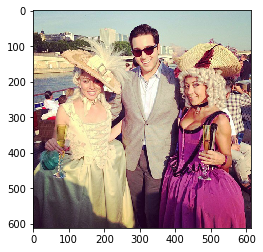

In [61]:
image = next(images)
plt.imshow(plt.imread(image))

In [62]:
detections = detector.detectObjectsFromImage(input_image=image, \
                                             output_type="array", \
                                             display_object_name = False, \
                                             display_percentage_probability = False, \
                                             extract_detected_objects = True, \
                                             minimum_percentage_probability = 75)


In [71]:
detections[1]

[{'name': 'person',
  'percentage_probability': 87.7937912940979,
  'box_points': array([359,  96, 616, 601])},
 {'name': 'person',
  'percentage_probability': 92.25521683692932,
  'box_points': array([  0, 126, 279, 603])},
 {'name': 'person',
  'percentage_probability': 88.80546689033508,
  'box_points': array([208,  46, 416, 591])}]

In [63]:
img1=detections[2][3]
imgarray = img1

IndexError: list index out of range

In [74]:
imgmain,imgitems,imgind = detections

In [78]:
imgitems

[{'name': 'person',
  'percentage_probability': 87.7937912940979,
  'box_points': array([359,  96, 616, 601])},
 {'name': 'person',
  'percentage_probability': 92.25521683692932,
  'box_points': array([  0, 126, 279, 603])},
 {'name': 'person',
  'percentage_probability': 88.80546689033508,
  'box_points': array([208,  46, 416, 591])}]

In [77]:
n_img = len(imgitems)
for p

3

In [73]:
plt.figure(figsize=(12,12))
plt.imshow(i)
plt.show()

<Figure size 864x864 with 0 Axes>

NameError: name 'imgarray' is not defined

<Figure size 864x864 with 0 Axes>

In [106]:
plt.close()
imgitems[0]['name']

'person'

## Evaluation with DeepF dataset ##

- Exclusion with bbox

In [3]:
with open('../data/Anno/list_bbox.txt', 'r') as bbox_file:
    list_bbox = [line.rstrip('\n') for line in bbox_file][2:]
    list_bbox = [line.split('/') for line in list_bbox]
    bb_dict= {l[1] + '/' + l[2].split()[0]: [int(xi) for xi in l[2].split()[-4:]] for l in list_bbox}


In [4]:
imgPath = '../fashion_data/test/'
images = os.walk(imgPath,topdown=False)

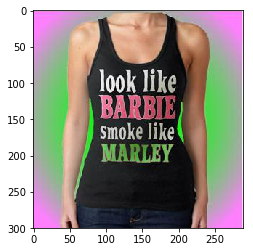

In [5]:
imgp=next(images)
imgi = imgp[0] + '/' + imgp[2][0]
plt.imshow(plt.imread(imgi))

In [6]:
imgi_parts = imgi.split('/')

In [7]:
bbkey = '/'.join(imgi.split('/')[-2:]); bbkey

'Barbie_Tank_Top/img_00000015.jpg'

In [8]:
bb_dict[bbkey]

[62, 1, 223, 300]

In [11]:
detections = detector.detectObjectsFromImage(input_image=imgi, \
                                             output_type="array", \
                                             display_object_name = False, \
                                             display_percentage_probability = False, \
                                             extract_detected_objects = True, \
                                             minimum_percentage_probability = 75)

In [12]:
imgmain,imgitems,imgind = detections

In [14]:
imgind

[array([[[228, 139, 233],
         [226, 140, 231],
         [226, 140, 229],
         ...,
         [229, 140, 232],
         [229, 140, 232],
         [229, 140, 234]],
 
        [[240, 131, 246],
         [239, 133, 244],
         [239, 133, 243],
         ...,
         [237, 133, 244],
         [237, 133, 244],
         [239, 133, 244]],
 
        [[242, 132, 247],
         [241, 133, 245],
         [240, 134, 244],
         ...,
         [236, 134, 243],
         [237, 133, 244],
         [237, 133, 244]],
 
        ...,
 
        [[232, 191, 185],
         [227, 182, 187],
         [225, 174, 183],
         ...,
         [209, 156, 208],
         [208, 153, 208],
         [206, 151, 208]],
 
        [[230, 189, 183],
         [226, 179, 185],
         [223, 172, 181],
         ...,
         [212, 155, 210],
         [210, 153, 208],
         [208, 150, 208]],
 
        [[230, 189, 183],
         [221, 174, 180],
         [210, 159, 168],
         ...,
         [214, 155, 211],
  

<Figure size 864x864 with 0 Axes>

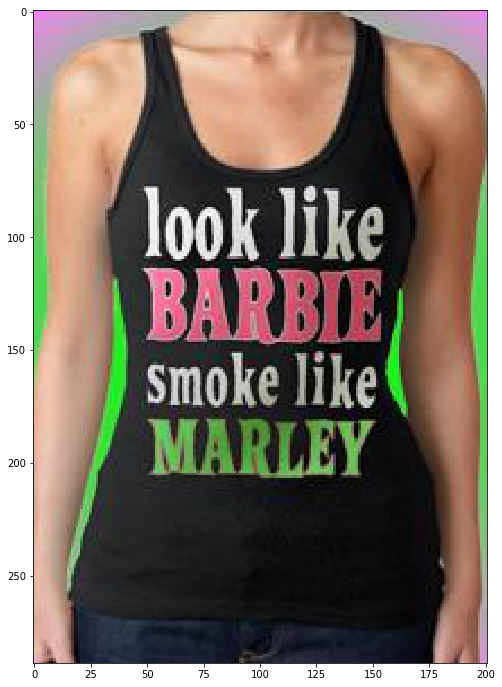

In [34]:
plt.figure(figsize=(12,12))
plt.imshow(imgind[0])
#plt.imshow(imgmain)
plt.show()

In [16]:
imgind[0].shape

(289, 201, 3)

<Figure size 864x864 with 0 Axes>

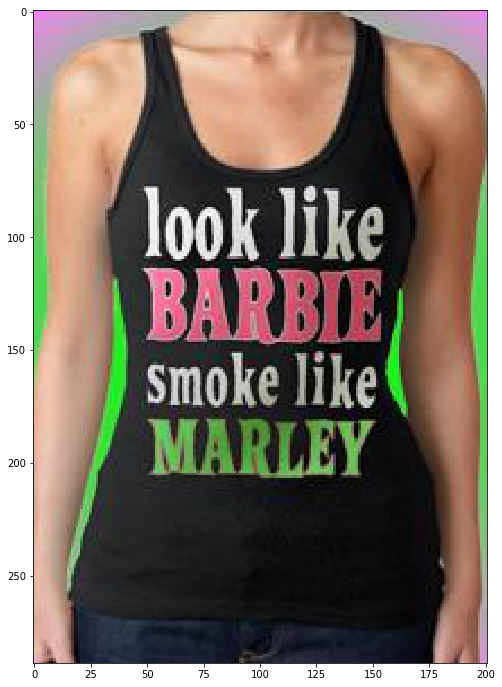

In [17]:
plt.figure(figsize=(12,12))
plt.imshow(imgind[0])

In [18]:
imgCheck = plt.imread(imgi)
w,h,_ = imgCheck.shape

In [19]:
x1,y1,x2,y2 = bb_dict[bbkey]
print(x1,y1,x2,y2)

62 1 223 300


In [20]:
rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1,edgecolor='r',facecolor='none')

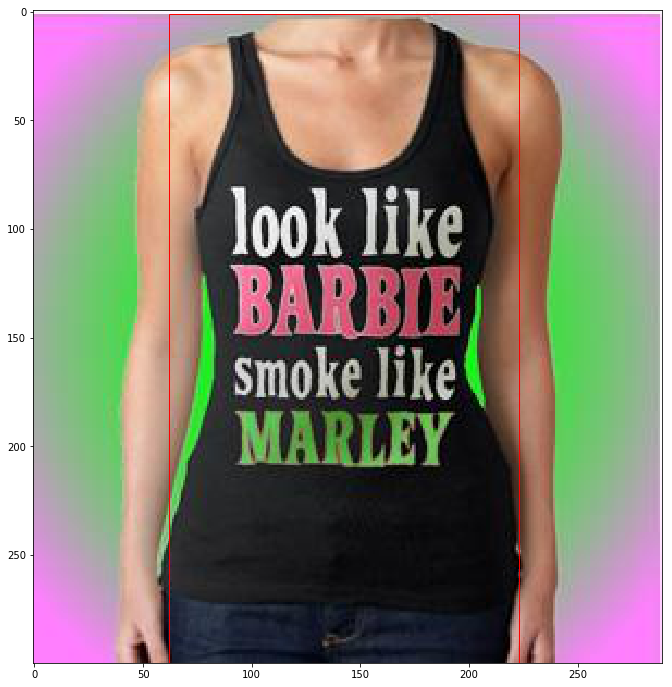

In [21]:
fig,ax = plt.subplots(1,figsize=(12,12))
ax.imshow(imgCheck)
ax.add_patch(rect)
plt.show()

In [33]:
print("shape=",imgCheck.shape)
print("bbox_refine =",x1,y1,x2,y2)

shape= (300, 289, 3)
bbox_refine = 20 0 181 289


In [22]:
imgitems

[{'name': 'person',
  'percentage_probability': 98.3864426612854,
  'box_points': array([ 42,   3, 243, 292])}]

## calculate IoU and choose correct item ##

In [23]:
# adapted from https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/
def bb_IoU(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)

    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)

    # return the intersection over union value
    return iou

# determine new BB for selected picture
def bb_Refine(bbInner,bbBase):
    x1i, y1i, x2i, y2i = bbInner
    x1b, y1b, x2b, y2b = bbBase
    bbInnerNew = [ max(x1i - x1b,0),
                   max(y1i - y1b,0),
                   min(x2i - x1b, x2b - x1b),
                   min(y2i - y1b, y2b - y1b)]
    
    return bbInnerNew

In [35]:
boxItem = bb_dict[bbkey]
IoUs = np.array([bb_IoU(boxItem, person['box_points']) for person in imgitems])

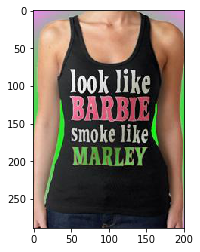

In [37]:
person=imgind[IoUs.argmax()] #if len(imgind) > 1 else imgmain
plt.imshow(person)

In [38]:
x1, y1, x2, y2 = bb_Refine(boxItem,imgitems[IoUs.argmax()]['box_points'])

In [39]:
rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1,edgecolor='r',facecolor='none')

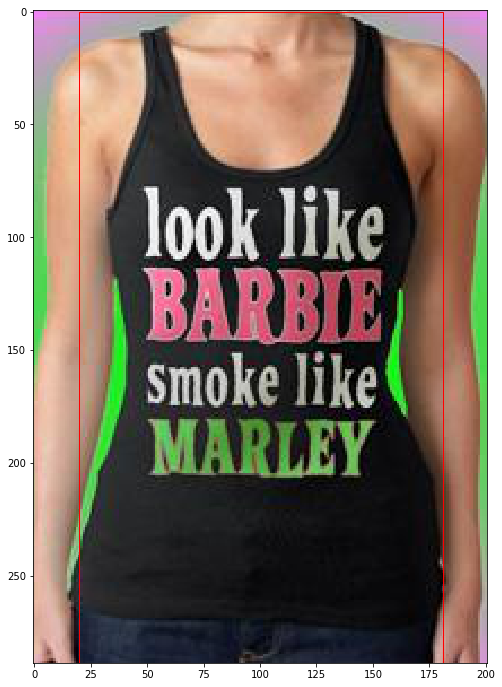

In [40]:
fig,ax = plt.subplots(1,figsize=(12,12))
ax.imshow(person)
ax.add_patch(rect)
plt.show()

In [165]:
%pwd

'/Users/rexbarker/BFH/CAS_PML/Project/DeepFashion/detect'

In [167]:
plt.imsave('person_refine.jpg',person)

---
# DirectorySequence Iterator for batch processing on multi-cpu
---